# Unnormalized log transformed: breast, prostate, thyroid

The unnormalized and log transformed breast, prostate and thyroid

In [1]:
from rna_resnet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
rnaNet = ResNet(layer_sizes=[6, 20])

folder = '../data/6pc/'
# GTEX as source and TCGA as target
source_file = 'unnorm-log-6PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-6PC-TCGA-breast-prostate-thyroid.csv'
source_path = folder + source_file
target_path = folder + target_file

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

rnaNet.load_data(source_path=source_path, target_path=target_path)

In [3]:
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))


gtex = source shape = (636, 6)
tcga = target shape = (211, 6)


In [4]:
rnaNet.init_res_net(cost='MMD',  val_split=0.2)

setting scales using KNN
[12.220440100310011, 24.440880200620022, 48.881760401240044]
setting all scale weights to 1


In [5]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
# callbacks=[rnaNet.lrate]
rnaNet.train(epochs=1000, callbacks=callbacks, batch_size=600, validation_split=0.2)

Train on 508 samples, validate on 128 samples
Epoch 1/1000
508/508 [==============================] - 0s 801us/step - loss: 1.0826 - val_loss: 1.7114
Epoch 2/1000
508/508 [==============================] - 0s 35us/step - loss: 1.1066 - val_loss: 1.6902
Epoch 3/1000
508/508 [==============================] - 0s 37us/step - loss: 1.0857 - val_loss: 1.7061
Epoch 4/1000
508/508 [==============================] - 0s 35us/step - loss: 1.1008 - val_loss: 1.7020
Epoch 5/1000
508/508 [==============================] - 0s 37us/step - loss: 1.0976 - val_loss: 1.6900
Epoch 6/1000
508/508 [==============================] - 0s 35us/step - loss: 1.0865 - val_loss: 1.6852
Epoch 7/1000
508/508 [==============================] - 0s 35us/step - loss: 1.0831 - val_loss: 1.6851
Epoch 8/1000
508/508 [==============================] - 0s 36us/step - loss: 1.0848 - val_loss: 1.6824
Epoch 9/1000
508/508 [==============================] - 0s 35us/step - loss: 1.0833 - val_loss: 1.6766
Epoch 10/1000
508/508 [===

Epoch 80/1000
508/508 [==============================] - 0s 37us/step - loss: 0.5483 - val_loss: 1.3279
Epoch 81/1000
508/508 [==============================] - 0s 35us/step - loss: 0.5162 - val_loss: 1.3216
Epoch 82/1000
508/508 [==============================] - 0s 38us/step - loss: 0.5230 - val_loss: 1.3360
Epoch 83/1000
508/508 [==============================] - 0s 38us/step - loss: 0.5112 - val_loss: 1.3287
Epoch 84/1000
508/508 [==============================] - 0s 36us/step - loss: 0.5194 - val_loss: 1.3060
Epoch 85/1000
508/508 [==============================] - 0s 35us/step - loss: 0.5026 - val_loss: 1.3126
Epoch 86/1000
508/508 [==============================] - 0s 35us/step - loss: 0.5186 - val_loss: 1.3238
Epoch 87/1000
508/508 [==============================] - 0s 35us/step - loss: 0.5025 - val_loss: 1.3252
Epoch 88/1000
508/508 [==============================] - 0s 34us/step - loss: 0.5046 - val_loss: 1.3298
Epoch 89/1000
508/508 [==============================] - 0s 35us

Epoch 159/1000
508/508 [==============================] - 0s 34us/step - loss: 0.4512 - val_loss: 1.3481
Epoch 160/1000
508/508 [==============================] - 0s 36us/step - loss: 0.4454 - val_loss: 1.3390
Epoch 161/1000
508/508 [==============================] - 0s 38us/step - loss: 0.4424 - val_loss: 1.3413
Epoch 162/1000
508/508 [==============================] - 0s 34us/step - loss: 0.4487 - val_loss: 1.3578
Epoch 163/1000
508/508 [==============================] - 0s 34us/step - loss: 0.4406 - val_loss: 1.3560
Epoch 164/1000
508/508 [==============================] - 0s 37us/step - loss: 0.4453 - val_loss: 1.3474
Epoch 165/1000
508/508 [==============================] - 0s 36us/step - loss: 0.4474 - val_loss: 1.3682
Epoch 166/1000
508/508 [==============================] - 0s 35us/step - loss: 0.4508 - val_loss: 1.3306
Epoch 167/1000
508/508 [==============================] - 0s 35us/step - loss: 0.4663 - val_loss: 1.3719
Epoch 168/1000
508/508 [==============================]

508/508 [==============================] - 0s 35us/step - loss: 0.4197 - val_loss: 1.3009
Epoch 238/1000
508/508 [==============================] - 0s 36us/step - loss: 0.4113 - val_loss: 1.3088
Epoch 239/1000
508/508 [==============================] - 0s 36us/step - loss: 0.4023 - val_loss: 1.2816
Epoch 240/1000
508/508 [==============================] - 0s 38us/step - loss: 0.4024 - val_loss: 1.2756
Epoch 241/1000
508/508 [==============================] - 0s 38us/step - loss: 0.4048 - val_loss: 1.2812
Epoch 242/1000
508/508 [==============================] - 0s 35us/step - loss: 0.4065 - val_loss: 1.2512
Epoch 243/1000
508/508 [==============================] - 0s 37us/step - loss: 0.4070 - val_loss: 1.2901
Epoch 244/1000
508/508 [==============================] - 0s 37us/step - loss: 0.4108 - val_loss: 1.2501
Epoch 245/1000
508/508 [==============================] - 0s 35us/step - loss: 0.4071 - val_loss: 1.2755
Epoch 246/1000
508/508 [==============================] - 0s 36us/step

Epoch 316/1000
508/508 [==============================] - 0s 35us/step - loss: 0.3889 - val_loss: 1.3010
Epoch 317/1000
508/508 [==============================] - 0s 35us/step - loss: 0.3888 - val_loss: 1.3031
Epoch 318/1000
508/508 [==============================] - 0s 39us/step - loss: 0.3888 - val_loss: 1.3055
Epoch 319/1000
508/508 [==============================] - 0s 36us/step - loss: 0.3887 - val_loss: 1.3082
Epoch 320/1000
508/508 [==============================] - 0s 37us/step - loss: 0.3886 - val_loss: 1.3109
Epoch 321/1000
508/508 [==============================] - 0s 35us/step - loss: 0.3885 - val_loss: 1.3134
Epoch 322/1000
508/508 [==============================] - 0s 36us/step - loss: 0.3885 - val_loss: 1.3160
Epoch 323/1000
508/508 [==============================] - 0s 38us/step - loss: 0.3884 - val_loss: 1.3184
Epoch 324/1000
508/508 [==============================] - 0s 38us/step - loss: 0.3884 - val_loss: 1.3207
Epoch 325/1000
508/508 [==============================]

In [6]:
print("finished training")
rnaNet.predict()
rnaNet.pca()
print("finished pca")

finished training
predicting on self.source
finished pca


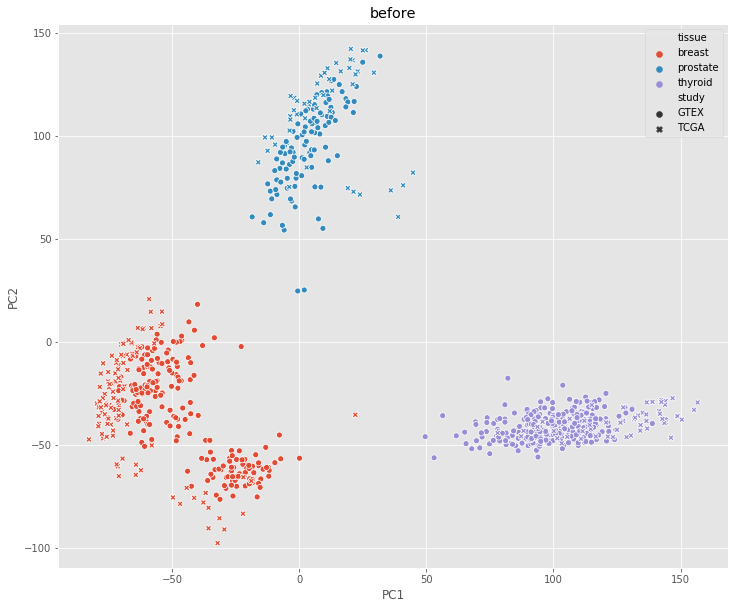

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('ggplot')

df = pd.concat([rnaNet.source_pca_df, rnaNet.target_pca_df])
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x='PC1', y='PC2', data=df, hue='tissue', style='study')
ax.set_title('before')
plt.show()

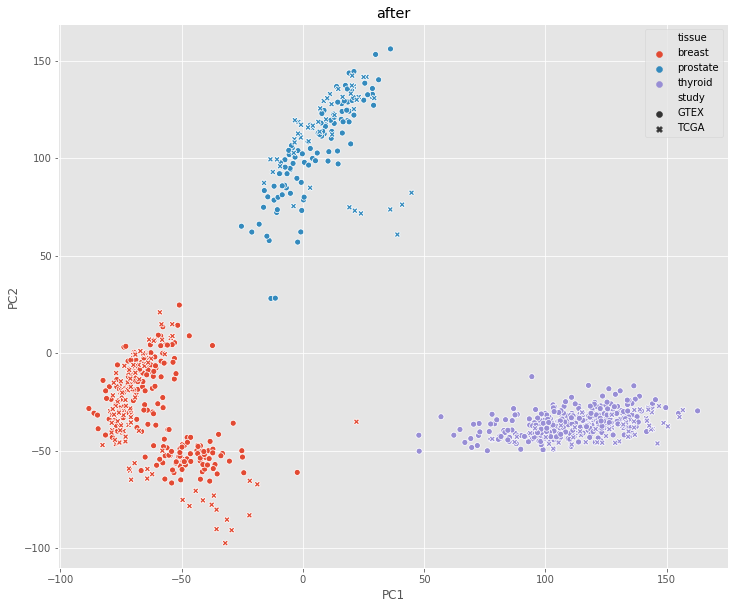

In [8]:
df = pd.concat([rnaNet.calibrated_source_pca_df, rnaNet.target_pca_df])
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x='PC1', y='PC2', data=df, hue='tissue', style='study')
ax.set_title('after')
plt.show()

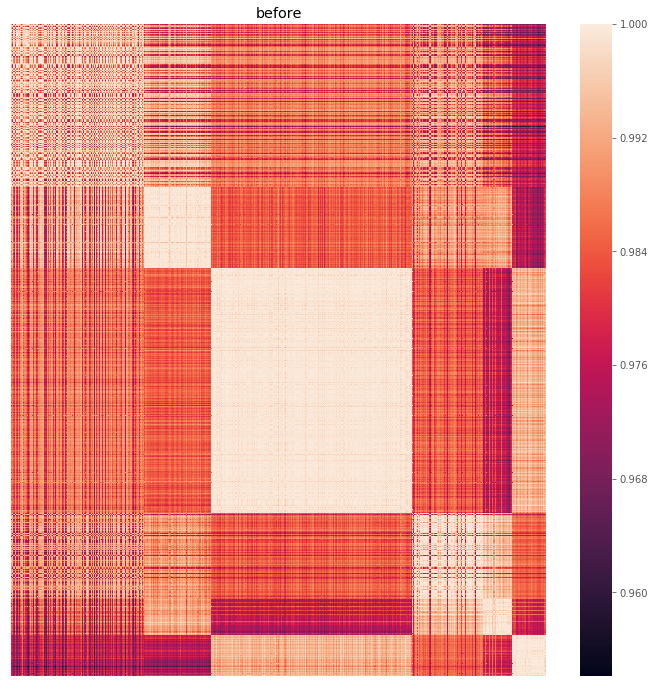

In [9]:
df = pd.concat([rnaNet.source_df, rnaNet.target_df])
df = df.drop(["study", "tissue"], axis=1).transpose().corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(df, xticklabels=False, yticklabels=False)
ax.set_title("before")
plt.show()

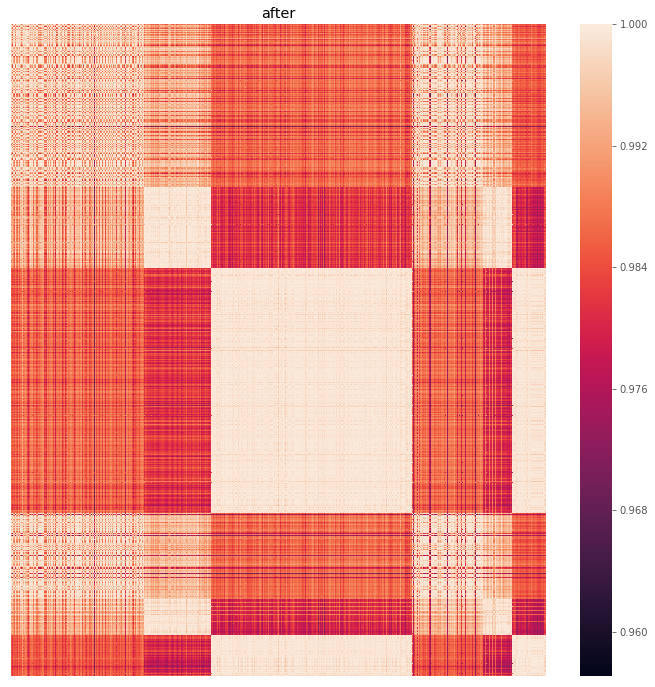

In [10]:
df = pd.concat([rnaNet.calibrated_source_df, rnaNet.target_df])
df = df.drop(["study", "tissue"], axis=1).transpose().corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(df, xticklabels=False, yticklabels=False)
ax.set_title("after")
plt.show()

In [11]:
import CostFunctions as cf
import keras.backend as K

source = rnaNet.source.astype('float32')
target = rnaNet.target.astype('float32')
calibrated_source = rnaNet.calibrated_source.astype('float32')

mmd = cf.MMD(source, target, MMDTargetSampleSize=target.shape[0], n_neighbors=10)
mmd_before = K.eval(mmd.cost(source, target))
mmd_after = K.eval(mmd.cost(calibrated_source, target))

print("MMD before: %0.10f" % mmd_before)
print("MMD after: %0.10f" % mmd_after)

setting scales using KNN
[9.112459421808506, 18.22491884361701, 36.44983768723402]
setting all scale weights to 1
MMD before: 0.8644757271
MMD after: 0.5438534617
